# COVID-19 Interactive Analysis Dashboard

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets



In [3]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [4]:
# confirmed_df.head()

In [5]:
# recovered_df.head()

In [6]:
# death_df.head()

In [7]:
# country_df.head()

In [8]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [9]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [10]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

# COVID-19 Confirmed/Death/Recovered cases by countries

## Enter number of countries you want the data for

In [11]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border_bottom=…

In [12]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

# Slide to check for the worst hit countries

In [14]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

In [15]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
        #print(i)
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    
    fig.show();

In [16]:
#plot_cases_of_a_country('US')

In [18]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

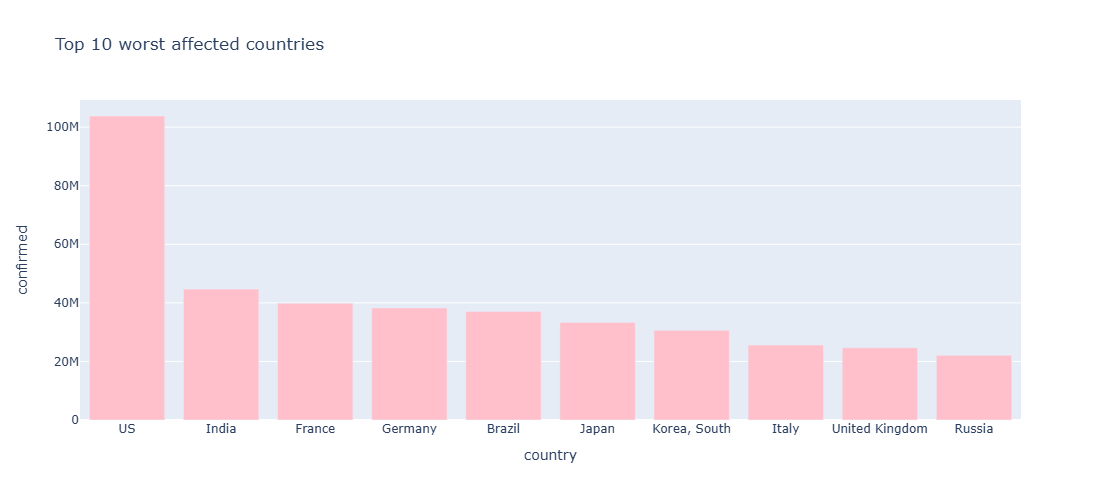

In [19]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

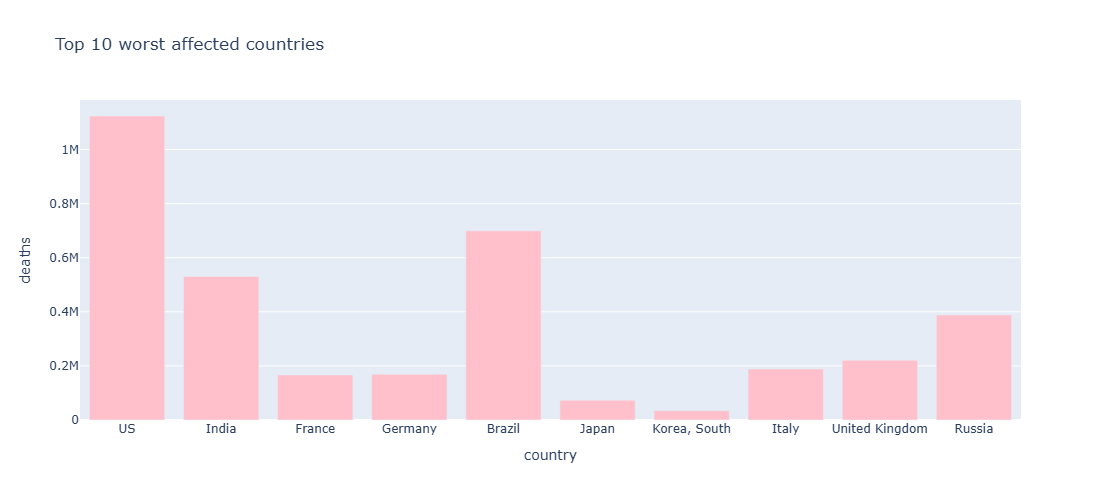

In [20]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

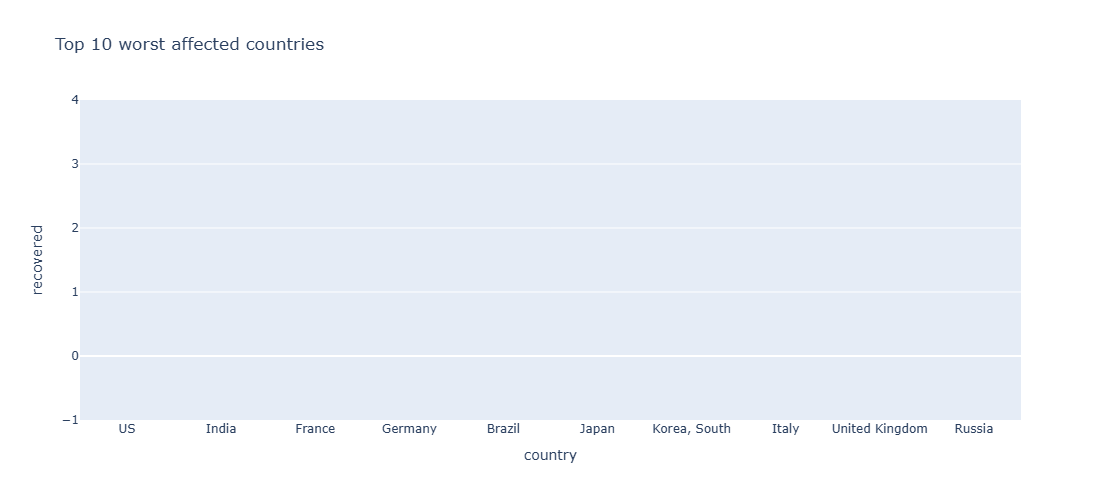

In [21]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [22]:
confirmed_df = confirmed_df.dropna(subset=['lat', 'long'])
world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map